# EE 538: Analog Circuits for Sensor Systems
## Autumn 2020
## Instructor: Jason Silver

## Announcements

 - Solution to Assignment 2 posted on JupyterHub
 - Assignment 2 due Sunday, October 25 at midnight
    - Jupyter Notebook (.ipyb) submission on Canvas
    - For LTspice problems, include image (e.g. screen capture) of schematic(s)

## Week 4

 - Art of Electronics (AoE) Chapters 4
 - Microelectronics (Sedra/Smith) Chapter 2

## Overview

 - Last time...
    - Common-emitter amplifier, cont.
    - Emitter-follower
    - Field-effect transistor
    - Small-signal FET model
 - Today...
     - Ideal opamp
     - Opamp characteristics
     - Opamp frequency response
     - Feedback
     - Stability


## Python packages/modules

In [2]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal
#%matplotlib notebook

def plot_xy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.plot(x, y, 'b')
    ax.grid()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
def plot_xy2(x1, y1, x1label, y1label, x2, y2, x2label, y2label):
    fig, ax = plt.subplots(2, figsize = (10.0, 7.5));
    ax[0].plot(x1, y1, 'b')
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].plot(x2, y2, 'b')
    ax[1].set_xlabel(x1label)
    ax[1].set_xlabel(x2label)
    ax[1].set_ylabel(y2label)
    ax[1].grid()
    
    fig.align_ylabels(ax[:])

def plot_logxy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5))
    ax.semilogx(x, y, 'b')
    ax.grid();
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
def plot_xlogy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.semilogy(x, y, 'b');
    ax.grid();
    ax.set_xlabel(xlabel);
    ax.set_ylabel(ylabel);
    
def read_ltspice_ac(file_name):
    with open(file_name, 'r') as data:
        x = []
        y = []
        z = []
        next(data) # skip header line
        for line in data:
            p = line.split()
            x.append(float(p[0]))
            complex = p[1].split(",")
            y.append(float(complex[0]))
            z.append(float(complex[1]))

    return x, y, z

def plot_logxy2(x1, y1, x2, y2, x1label, y1label, x2label, y2label):
    fig, ax = plt.subplots(2, figsize = (8.0, 6.0));
    ax[0].semilogx(x1, y1, 'b');
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].semilogx(x2, y2, 'b');
    ax[1].set_xlabel(x1label)
    ax[1].set_xlabel(x2label);
    ax[1].set_ylabel(y2label);
    ax[1].grid();
    
    fig.align_ylabels(ax[:])

## Ideal Opamp

<center><img src="img/opamp_model.png" width=600 /></center>

$$ R_{in} \rightarrow \infty $$


$$ R_{out} \rightarrow 0 $$


$$ A_{0} \rightarrow \infty $$

 - An opamp converts a differential input voltage $v^+$ to an output voltage $v_{out}$ via the relation
 
 $$ v_{out} = A_0\cdot (v^+ - v^-)$$
 
 - For an ideal opamp, both gain and input resistance are infinite, while output resistance is zero
 - An ideal opamp's output changes instantaneously with a change in the input
 - An ideal opamp contributes no offset or added noise to the signal
 
 

## Opamp golden rules

<center><img src="img/opamp_symbol.png" width=400 /></center>

$$ A_0 \rightarrow \infty $$ $$\rightarrow  v^+ = v^-$$

$$ i^+ = i^- = 0 $$

 When analyzing opamp circuits, always keep in mind the following "golden rules"
 1. The opamp tries to do whatever it takes to make the voltage difference between the inputs zero
 2. The input(s) draw no current
 

## Ideal inverting amplifier

<center><img src="img/ideal_inverting.png" width=500 /></center>

$$ v^- = v^+ = 0 $$

$$ v_{out} = 0 - \frac{v_{in}}{R_i}\cdot R_f $$

$$ G_0 = \frac{v_{out}}{v_{in}} = -\dfrac{R_f}{R_i} $$

 - Infinite DC gain ensures that the voltage at the inverting terminal $v^-$ is maintained at ground
 - The "zero-input-current" property of the opamp ensures that the current through $R_f$ is equal to that through $R_i$
 - For an ideal opamp, the *closed-loop* gain only depends on the ratio of $R_f$ to $R_i$
 - *Note*: If the opamp uses a single supply (i.e. $-V_{EE} = 0$), the non-inverting terminal should be connected to a DC voltage between $V_{CC}$ and ground. However, the analysis of the gain is identical, as the non-inverting terminal can be treated as an AC ground.  

## Finite open-loop gain

<center><img src="img/inverting_amplifier.png" width=500 /></center>

$$ v^- = v^+ - v_{out}/A_v = - v_{out}/A_v $$


\begin{equation}
i_{in} = \dfrac{v_{in} - v^-}{R_i}  = \dfrac{v_{in} + \frac{v_{out}}{A_0}}{R_i}
\end{equation}

\begin{equation}
v_{out} = \dfrac{-v_{out}}{A_0} -\dfrac{v_{in} + \frac{v_{out}}{A_0}}{R_i}\cdot R_f
\end{equation}

$$ G_0 = \dfrac{v_{out}}{v_{in}} = -\dfrac{R_f}{R_i}\cdot \dfrac{1}{1+\frac{1}{A_0}\left(1+\frac{R_f}{R_i}\right)}$$

 - With finite gain, the opamp input current is still zero, but $v^- \ne v^+$
 - The finite *open-loop* gain $A_0$ results an error in the *closed-loop* gain that is dependent on the magnitude of $A_0$
 - This is a clear example of how the *precision* of closed-loop gain depends on the magnitude of the open-loop gain in a negative feedback system

## Negative feedback

<center><img src="img/basic_feedback.png" width=600 /></center>


$$ G = \dfrac{s_o}{s_i} = \dfrac{A}{1+\beta A} $$
<br>
<center>as $A \rightarrow \infty $, $\; G \rightarrow \dfrac{1}{\beta}$</center>

 - Negative feedback is used to process the *error* signal $s_i - \beta s_o $
 - A larger value of $A$, sometimes called the *forward gain* results in a smaller error, as $\beta s_o \rightarrow s_i$
 - The *feedback factor* $\beta \leq 1$ is the fraction of the output signal fed back to be compared with the input
 - $s_i$ and $s_o$ can be either voltages or currents, affecting the units of $A$ and $\beta$


## Non-inverting amplifier

<center><img src="img/non_inverting_amplifier.png" width=600 /></center>

$$ A = A_0 $$

$$ \beta = \dfrac{R_i}{R_i + R_f} $$

$$G_0 = \dfrac{v_{out}}{v_{in}} = \dfrac{A_0}{1+\beta A_0} = \dfrac{A_0}{1 + \dfrac{R_i}{R_i + R_f}\cdot A_0}$$

<center>as $A_0 \rightarrow \infty$, $\; G_0 \rightarrow \boxed{1+\dfrac{R_f}{R_i}}$

 - We see that the closed-loop gain $G_0$ is $1+\beta A_0$ times *lower* than the open-loop gain $A_0$
 - As the *open-loop* gain $A_0$ is increased, the *closed-loop* gain becomes less dependent on $A_0$, and more defined by $\beta$
 - The term $\beta A_0$ is sometimes called the *loop gain*, and its magnitude determines closed-loop precision, input impedance, output impedance, and bandwidth
 - *Note*: The non-inverting amplifier is an example of *series-shunt* feedback

## Closed-loop gain precision

In [3]:
def plot_logxy2_1axis(x, y1, y2, xlabel, y1label, y2label):
    fig, ax1 = plt.subplots(figsize=(10.0, 8.0))
    color='blue'
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(y1label, color=color)
    ax1.semilogx(x, y1)
    ax1.grid()
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx() 

    color = 'red'
    ax2.set_ylabel(y2label, color=color)  
    ax2.semilogx(x, y2, color=color)
    ax2.grid()
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  


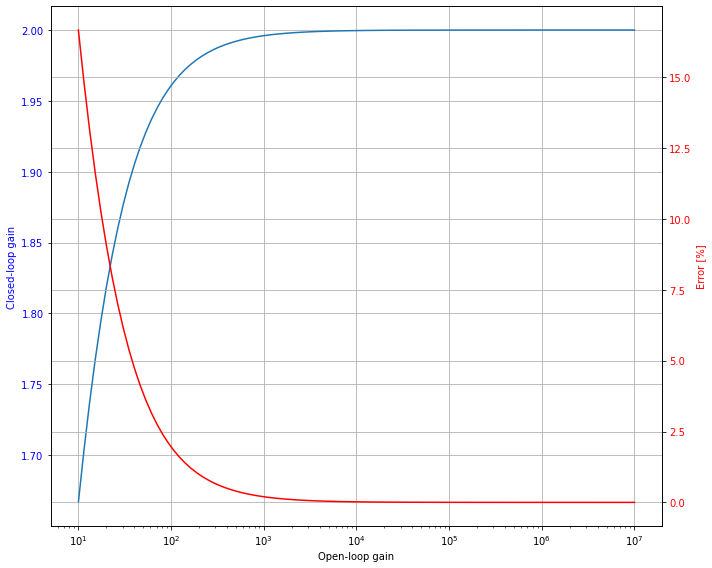

In [8]:
A0_vals = np.logspace(1,7,num=100)      # min: 0dB, max: 140dB
beta = 0.5                              # R1 = R2
G_vals = A0_vals/(1+beta*A0_vals)       # closed-loop gain
plot_logxy2_1axis(A0_vals, G_vals, 100*(1/beta-G_vals)/(1/beta), 'Open-loop gain', 'Closed-loop gain', 'Error [%]')

 - As the open-loop gain is increased we see a smaller error between the ideal and actual closed-loop gain values

## Input impedance

## Output impedance

## Finite bandwidth

 - Real opamps cannot respond instantaneously to changes in their input voltages
 - For most purposes, the *open-loop* frequency response of an opamp can be treated as first-order (single pole)
 - Opamp datasheets specify bandwidth as *transit frequency* or *gain-bandwidth* product, which for a first-order system is the product of the DC gain $A_0$ and the $3dB$ bandwidth $f_{3dB} = \dfrac{\omega_0}{2 \pi}$:
 
$$ f_t = A_0 \cdot f_{3dB} =  \dfrac{A_0\cdot \omega_0}{2\pi}$$

$$ A_v(j\omega) = \dfrac{A_0}{1+j\omega/\omega_0}$$

$$ |A_v(j\omega)| = \dfrac{A_0}{\sqrt{1+\omega^2/\omega_0^2}} $$

$$ \angle A_v(j\omega) = -\tan^{-1}(\omega/\omega_0)$$

## Gain-bandwidth product

<center><img src="img/CE_bandwidth.png" width=400 /></center>

$$ A_0 = -g_m\cdot R_C $$

$$ \omega_0 = \dfrac{1}{R_C\cdot C_L}$$

$$ A_v(j\omega) = \dfrac{A_0}{1+j\omega/\omega_0}$$

$$ f_t = A_0 \cdot f_{3dB} =  \dfrac{-g_m \cdot R_C}{2\pi \cdot R_C \cdot C_L} = \dfrac{g_m}{2\pi \cdot C_L}$$

 - Although opamps are significantly more complex, the concept of gain-bandwidth product can be demonstrated using a simple gain stage like the common-emitter amplifier 
 - Because the output resistance $R_C$ appears in the expressions for both gain and $3 dB$ bandwidth, an increase in $R_C$ increases gain while decreasing bandwidth, making their product constant
 - Gain and bandwidth for opamps are determined in a similar manner, just with different resistances and capacitances
 - Note that the dependence of bandwidth on $g_m$ indicates a tradeoff between speed and power, since $g_m$ depends on bias current

## Opamp frequency response

 - A typical opamp has DC gain ($A_0$) from $100-160dB$ and gain-bandwidth product ($f_t$) from $1-100MHz$
 - From these two parametsr we can determine the frequency response

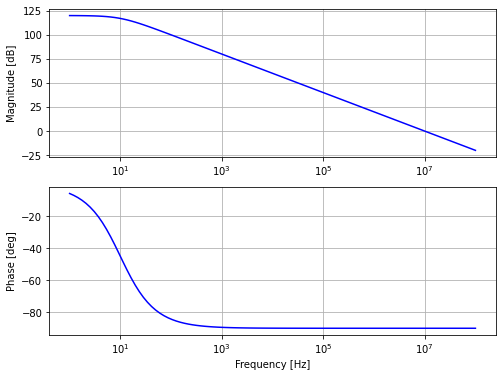

In [5]:
A_dB = 120
A_0 = 10**(A_dB/20)
f_t = 10e6
f_3dB = f_t/A_0
w_0 = f_3dB*2*np.pi
f = np.logspace(0,8, num=100)
A_s = signal.TransferFunction([A_0], [1/w_0, 1])
w, mag, phase = A_s.bode(w=f*2*np.pi)               
plot_logxy2(f, mag, f, phase, 'Frequency [Hz]', 'Magnitude [dB]',
           'Frequency [Hz]', 'Phase [deg]')

 - Note that we didn't need the $3dB$ bandwidth to determine the frequency response!

## Closed-loop frequency response

 - We can readily determine the closed-loop frequency response using the following expression
 
$$ G(s) = \dfrac{A_v(s)}{1+\beta A_v(s)} $$
 
 - Substituting $ A_v(s) = \frac{A_0}{(1+s/\omega_0)} $ gives
 
$$ G(j\omega) = \dfrac{A_v(s)}{1+\beta A_v(s)} =  \dfrac{A_0}{1+s/\omega_0+\beta A_0}$$

 - We can solve for the pole location by setting the denominator equal to 0:
 
$$ 1+s/\omega_0+\beta A_0 = 0 \rightarrow \boxed{s = -\omega_0\cdot(1+\beta A_0)} $$

 - The pole frequency is the *magnitude* of this expression
 
$$ \omega_{3dB,CL} = \lvert-\omega_0\cdot(1+\beta A_0)\rvert = \omega_0 \cdot (1+\beta A_0)$$

## Closed-loop bandwidth

 - From the preceding analysis, we see that the closed-loop pole frequency is $1 + \beta A_0$ times *higher* than that of the open-loop pole
 - The term $\beta A_0$ is often referred to as the *loop gain*, and it can be used to understand the effect of feedback on 